# Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2 as cv
from sklearn import linear_model
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
plt.style.use("seaborn")

# Helping Functions

In [4]:
def plot_image(image):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show(block = True)

In [5]:
def display_image(image):
    cv.imshow('image', image)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [6]:
def MinMaxScalar(x, a = -1, b = 1):
    N = (x - x.min()) * (b - a)
    D = (x.max() - x.min())
    return (N / D) + a

# Activate Functions

In [7]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [8]:
def relu(t):
    return np.maximum(0 , t)

In [9]:
def swish(t):
    return t / (1 + np.exp(-t))

In [10]:
def softplus(t):
    return np.log(1 + np.exp(t))

# Loadings

In [11]:
def preprocess_line(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    blur = cv.bilateralFilter(gray, 3, 75, 75)
    
    thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

    k = 5
    kernal = np.ones((k, k), np.uint8)
    dilate = cv.dilate(thresh, kernal, iterations = 1)
    
    k = 21
    kernal = np.ones((k, k), np.uint8)
    erode = cv.erode(dilate, kernal, iterations = 1)
    
    return erode

In [12]:
line1 = cv.imread('line1.jpg')
preprocessed_line1 = preprocess_line(line1)

plt.figure(figsize = (18, 10))
sns.scatterplot(np.arange(len(sum_line_scaled)), sum_line_scaled, alpha = 0.5, label = 'scaled')
sns.scatterplot(np.arange(len(sum_line_scaled)), sigmoid(sum_line_scaled), alpha = 0.7, label = 'sigmoid')
# sns.scatterplot(np.arange(len(sum_line_scaled)), relu(sum_line_scaled), alpha = 0.7, label = 'relu')
# sns.scatterplot(np.arange(len(sum_line_scaled)), swish(sum_line_scaled), alpha = 0.7, label = 'swish')
sns.scatterplot(np.arange(len(sum_line_scaled)), softplus(sigmoid(sum_line_scaled)), alpha = 0.7, label = 'softplus')

In [13]:
def word_extraction(preprocessed_line1, line1):
    sum_line = preprocessed_line1.sum(axis = 0)
    sum_line_scaled = MinMaxScalar(sum_line, -1, 1)
    scaled_activated_sum = softplus(sigmoid(sum_line_scaled))

    #model1
    l = scaled_activated_sum
    maximum = max(l)
    cutout_dip = []
    cutout_up = []
    
    for i in range(len(l)):
        if (i + 1) != len(l):
            if l[i] == maximum:
                if (l[i + 1] < maximum):
                    cutout_dip.append(i)
            
            if l[i] < maximum:
                if (l[i + 1] == maximum):
                    cutout_up.append(i)               
    
    #model2
    cutout_images = []
    gray_line1 = cv.cvtColor(line1, cv.COLOR_BGR2GRAY)
    for up, dip in zip(cutout_up, cutout_dip):
        temp = gray_line1[:, dip : up]
        cutout_images.append(temp)
    
    return cutout_images

In [14]:
cutout_images = word_extraction(preprocessed_line1, line1)

image number :  1


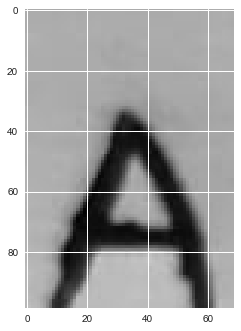

image number :  2


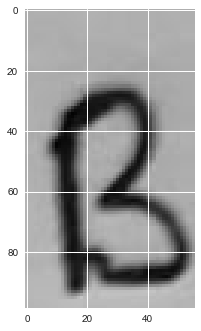

image number :  3


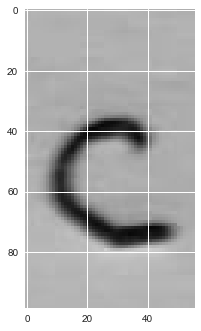

image number :  4


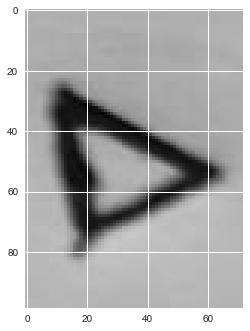

image number :  5


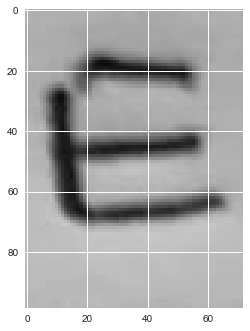

In [15]:
for i in range(len(cutout_images)):
    print("image number : ", i + 1)
    plt.imshow(cv.cvtColor(cutout_images[i], cv.COLOR_BGR2RGB))
    plt.show(block = True)

# cutting on horizontal axis of word

In [16]:
cv.imwrite('A Padding.jpg', cutout_images[0])

True

In [17]:
def preprocess_word(image):
#     gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    blur = cv.bilateralFilter(image, 3, 75, 75)
    
    thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

    k = 5
    kernal = np.ones((k, k), np.uint8)
    dilate = cv.dilate(thresh, kernal, iterations = 1)
    
    k = 15
    kernal = np.ones((k, k), np.uint8)
    erode = cv.erode(dilate, kernal, iterations = 1)
    
    return erode

In [18]:
def word_extraction_T(preprocessed_line1, line1):
    sum_line = preprocessed_line1.sum(axis = 0)
    sum_line_scaled = MinMaxScalar(sum_line, -1, 1)
    scaled_activated_sum = softplus(sigmoid(sum_line_scaled))

    #model1
    l = scaled_activated_sum
    maximum = max(l)
    cutout_dip = []
    cutout_up = []
    
    for i in range(len(l)):
        if (i + 1) != len(l):
            if l[i] == maximum:
                if (l[i + 1] < maximum):
                    cutout_dip.append(i)
            
            if l[i] < maximum:
                if (l[i + 1] == maximum):
                    cutout_up.append(i)               
    
    #model2
    cutout_images = []
#     gray_line1 = cv.cvtColor(line1, cv.COLOR_BGR2GRAY)
    for up, dip in zip(cutout_up, cutout_dip):
        temp = line1[:, dip : up]
        cutout_images.append(temp.T)
    
    return cutout_images

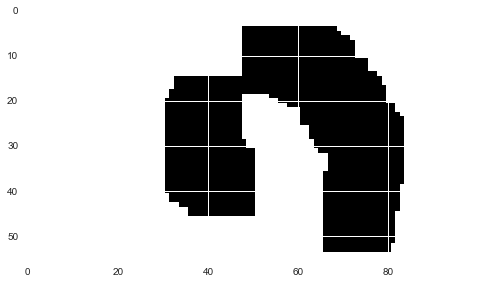

In [19]:
temp1 = cutout_images[0]
word1 = cutout_images[2]
preprocessed_word1 = preprocess_word(word1)
word1_T = preprocessed_word1.T
plot_image(word1_T)

<AxesSubplot:>

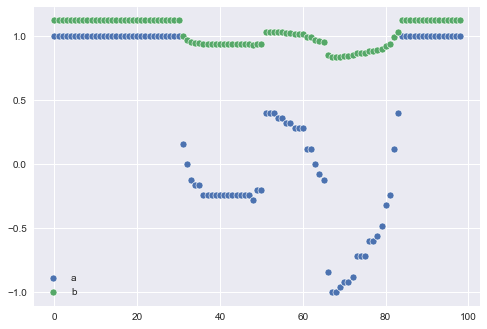

In [20]:
sns.scatterplot(np.arange(len(word1_T.sum(0))),MinMaxScalar(word1_T.sum(0)), label = 'a')
sns.scatterplot(np.arange(len(word1_T.sum(0))),softplus(sigmoid(MinMaxScalar(word1_T.sum(0)))), label = 'b')

In [21]:
cutout_images = word_extraction_T(word1_T, word1.T)

In [22]:
cutout_images

[array([[178, 178, 177, ..., 173, 173, 173],
        [179, 179, 177, ..., 171, 172, 172],
        [174, 174, 170, ..., 173, 173, 174],
        ...,
        [184, 184, 184, ..., 176, 175, 175],
        [184, 184, 184, ..., 177, 176, 176],
        [183, 183, 184, ..., 179, 178, 178]], dtype=uint8)]

image number :  1


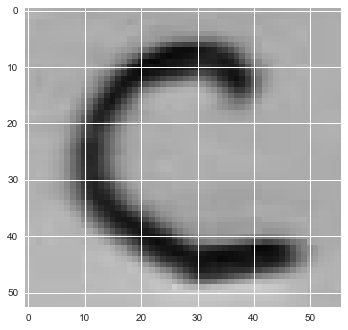

In [23]:
for i in range(len(cutout_images)):
    print("image number : ", i + 1)
    plt.imshow(cv.cvtColor(cutout_images[i], cv.COLOR_BGR2RGB))
    plt.show(block = True)

# New

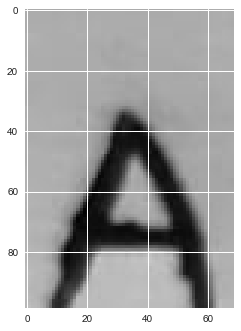

In [24]:
plot_image(temp1)

<AxesSubplot:>

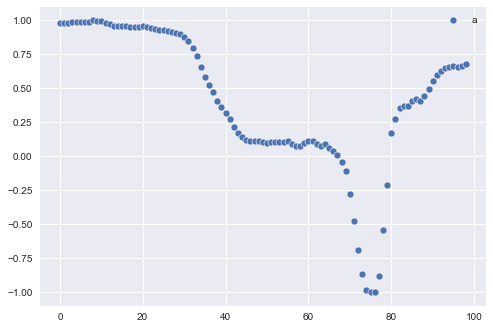

In [25]:
sns.scatterplot(np.arange(len(temp1.T.sum(0))),MinMaxScalar(temp1.T.sum(0)), label = 'a')

In [26]:
max_pad_color = int(temp1.max())

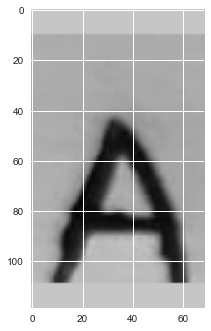

In [27]:
temp1_P = cv.copyMakeBorder(temp1, 10, 10, 0, 0, cv.BORDER_CONSTANT, value = max_pad_color)
plot_image(temp1_P)

<AxesSubplot:>

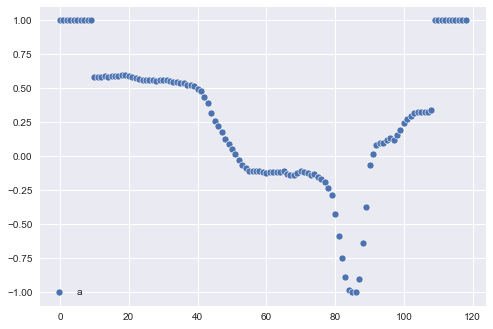

In [28]:
sns.scatterplot(np.arange(len(temp1_P.T.sum(0))),MinMaxScalar(temp1_P.T.sum(0)), label = 'a')

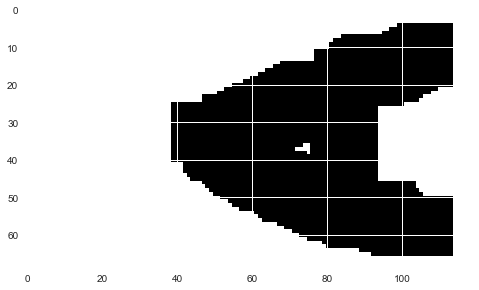

In [29]:
preprocessed_word1 = preprocess_word(temp1_P)
word1_T = preprocessed_word1.T
plot_image(word1_T)

In [30]:
cutout_images = word_extraction_T(word1_T, temp1_P.T)

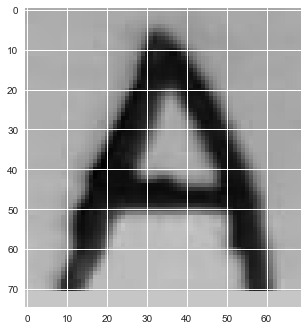

In [31]:
plot_image(cutout_images[0])

image number :  1


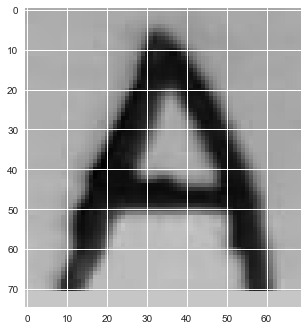

In [32]:
for i in range(len(cutout_images)):
    print("image number : ", i + 1)
    plt.imshow(cv.cvtColor(cutout_images[i], cv.COLOR_BGR2RGB))
    plt.show(block = True)